In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import pymongo
import json
import charts
import numpy as np
import re
from wordcloud import WordCloud,ImageColorGenerator
import jieba  
import jieba.analyse
from PIL import Image
from matplotlib import pylab, mlab, pyplot

Server running in the folder E:\DataAnalysis\DataVisualization at 127.0.0.1:59311


In [4]:
# 设置MongoDB连接信息
client = pymongo.MongoClient('localhost',27017)
db_data = client['data']

In [4]:
temp_weibo_keyword = db_data['temp_weibo_keyword']
data = temp_weibo_keyword.aggregate([    {
        '$project': { '_id': '$_id', 'count': '$value.count' }
    }, {
        '$sort': { 'count': -1 }
    }, {
        '$limit': 20
    }
])

data = pd.DataFrame(list(data))
data.rename(columns={'_id':u'关键词','count':u'参与人数'},inplace=True)
data.set_index(u'关键词', inplace=True)

In [5]:
options={ 
    'chart': {
        'type': 'column'
    },
    'xAxis': {
        'categories': [],
        'crosshair': 'true'
    },
    'title':{'text':'热门关键词TOP20'}
}
charts.plot(data,options=options,show='inline')

In [11]:
temp_weibo_text=db_data['temp_weibo_text']
data_text = temp_weibo_text.find().limit(500000)

In [15]:
data_text = list(data_text)
text_list = []
i = 0
for text in data_text:
    string = re.sub(r'</?\w+[^>]*>', '', text[u'text']) \
        .replace(u'网页链接', '') \
        .replace(u'全文', '') \
        .replace(u'我们', '') \
        .replace(u'现在', '') \
        .replace(u'现在', '') \
        .replace(u'就是', '') \
        .replace(u'可以', '') \
        .replace(u'没有', '') \
        .replace(u'如果', '') \
        .replace(u'他们', '') \
        .replace(u'开始', '') \
        .replace(u'真的', '') \
        .replace(u'一样', '') \
        .replace(u'你们', '').encode(encoding='UTF-8')
    print u'开始对字符串进行分词', time.ctime()
    string_text = " ".join(jieba.cut(string)).encode(encoding='UTF-8')
    text_list.append(string_text)
    i += 1
    print u'成将第', i, u'条数据加入数组'

print u'开始将数组转换为字符串', time.ctime()
text_str = "".join(text_list)
with open('./text.txt', 'w') as fp:
    fp.write(text_str)

In [4]:
str_text = open(u'./text.txt','r').readlines()[0:200000]
str_text = '\n'.join(str_text)
str_text=str_text.decode('utf-8')
str_text.replace(u'一个', '') \
        .replace(u'今人', '') \
        .replace(u'发表', '') \
        .replace(u'博文', '') \
        .replace(u'自己', '') \
        .replace(u'还是', '') \
        .replace(u'这样', '') \
        .replace(u'什么', '') \
        .replace(u'自己', '') 
# str_text.decode('UTF-8')
# str_text=str_text.replace('gt', '') \
#         .replace('quot', '') \

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Populating the interactive namespace from numpy and matplotlib


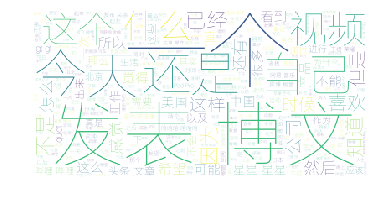

In [5]:
wordcloud = WordCloud(
    font_path='./HYQiHei-25J.ttf',
    #设置背景色
    background_color='white',
#     mask=mask,
    max_words=3000, 
    max_font_size=100, 
    random_state=42
)
wordcloud = wordcloud.generate(str_text)
# wordcloud = wordcloud.generate(u"他 扮演 的 一个 什么 料 都 能 挖出来 的 媒体 记者")
wordcloud.to_file('wordcloud.png')

%pylab inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
temp_weibo_gender_time = db_data['temp_weibo_gender_time']
time_data  = temp_weibo_gender_time.find()
time_temp =[]
for value in list(time_data):
    gender = value[u'value']
    time_temp.append({'hour':value['_id'],'man':gender[u'man'],'woman':gender[u'woman']})
time_data = pd.DataFrame(time_temp)
time_data.set_index(u'hour', inplace=True)

In [8]:
options={ 
    'chart': {
        'type': 'column'
    },
    'xAxis': {
        'categories': [],
        'crosshair': 'true'
    },
    'title':{'text':'男性和女性在不同时间的活跃量'}
}
charts.plot(time_data,options=options,show='inline')